# Project: Dynamics of Bargaining Pwer
# Standard dynamic model (Simulation)

#### Genaro, Itza, Sonia
#### June 2021 

This code was made specifically to simulate a contract with the dynamic model of principal-agent proposed by ... 

## Libraries

In [1]:
using DataFrames
using XLSX
using ExcelFiles  # Loading excel files libraries.
using Random
using Plots,Plots.PlotMeasures 

## Utility Functions

In [2]:
#v(c,a,g=1,alpha=1)=-exp(g*(a-alpha*c))  # Declaration of v (agent utility function); 
                                        # g is the coefficient of risk aversion
                                        # alpha is a cost coefficientv

v(c, a, h=0.5) =  c^(1-h)/(1-h)- a^2 #CRA Function 
                                    #h is a oefficient of risk aversion
                                    # a is the agent effort
u(y,w)=y-w  #Declaration of the principal utility function 
            #y is the current output
            #w is the salary paid to the agent

u (generic function with 1 method)

## Variables and Lists

In [3]:
A = [0.1 0.2]    # Actions set [al ah]
Y = [0.4 0.8]    # Outcomes set [yl yh]
f = [2/3 1/3; 1/3 2/3]    # Probability matrix  [yh|ah yl|ah; yh|al yl|al]
beta = 0.96    # Future discount factor
h = 0.5 #Risk AdversionParameter for agent utility 
Est_point = DataFrame(XLSX.readtable("CRA/DataEstPointh0.5.xlsx", "Sheet1")...) #Data of the optimal contracts
k0 = 45 #Initial index of the contract
n = size(Est_point)[1] #Dataframe lenght
N = 100 #Number of periods to simulate
min_k = Est_point[1, "K"]
max_k = Est_point[n, "K"]

98

## Output Simulation Function

In [4]:
function output(a)
    """
    This functions simulates an output given an effort level. 
    Returns output 
    """
    y = 0
    r = rand()
    if a == 0.2
        if r<f[1,1]
            y = Y[2]
        else 
            y = Y[1]
        end
    else
        if r<f[2,1]
            y = Y[2]
        else
            y = Y[1]
        end
    end
    return y
end

output (generic function with 1 method)

## One step Simulation 

In [5]:
function sim_one_period(k)
    """
    This functions simulates one period in the contract given an initial level k.
    Returns current period compensation, action and output; next period delta and promised utilities. 
    """
    a = Est_point[k,"Accion_Recomendada"]
    y = output(a)
    comp = 0
    
    if y == Y[1]
        comp = Est_point[k, "Compensacion_YL"] 
    else 
        comp = Est_point[k, "Compensacion_YH"]
    end
    ag_ut = v(comp, a, h) 
    pr_ut = u(y, comp) 
    return y, a, comp, ag_ut, pr_ut
end

sim_one_period (generic function with 1 method)

## Simulation of the contract.

In [6]:
function run_sim(k, N)
    """
    This functions simulates a number (N) of contract periods.  
    Returns simulation data with implemented effort levels, 
    bargaining powers,outputs and compentations. 
    """
    Ac = []
    Out = []
    Comps = []
    Agent = []
    Principal = []
    disc_ag = 0 
    disc_pr = 0
    for i in 1:N
        y, a, comp, ag_ut, pr_ut = sim_one_period(k)
        disc_ag += (beta^(i-1))*ag_ut
        disc_pr += (beta^(i-1))*pr_ut
        append!(Ac, a)
        append!(Out, y)
        append!(Comps, comp)
        append!(Agent, disc_ag)
        append!(Principal, disc_pr)
    end
    res_sim = DataFrame(
    Effort = Ac,
    Compensations = Comps,
    Outputs = Out, 
    Agent_Utility = Agent, 
    Principal_Utility = Principal)
    return res_sim
end

run_sim (generic function with 1 method)

In [7]:
Simulation_data = run_sim(k0, N)
#save("CRA/Simulations/Sim_cra_h50_2.xlsx", Simulation_data) #Save data of stationary point to excel

,Effort,Compensations,Outputs,Agent_Utility,Principal_Utility
,Any,Any,Any,Any,Any
1,0.2,0.164261,0.8,0.770583,0.635739
2,0.2,0.164261,0.8,1.51034,1.24605
3,0.2,0.164261,0.8,2.22051,1.83195
4,0.2,0.12981,0.4,2.82265,2.07099
5,0.2,0.12981,0.4,3.4007,2.30048
6,0.2,0.164261,0.8,4.02901,2.81884
7,0.2,0.12981,0.4,4.56174,3.03033
8,0.2,0.164261,0.8,5.1408,3.50806
9,0.2,0.164261,0.8,5.69669,3.96667


## Plotting

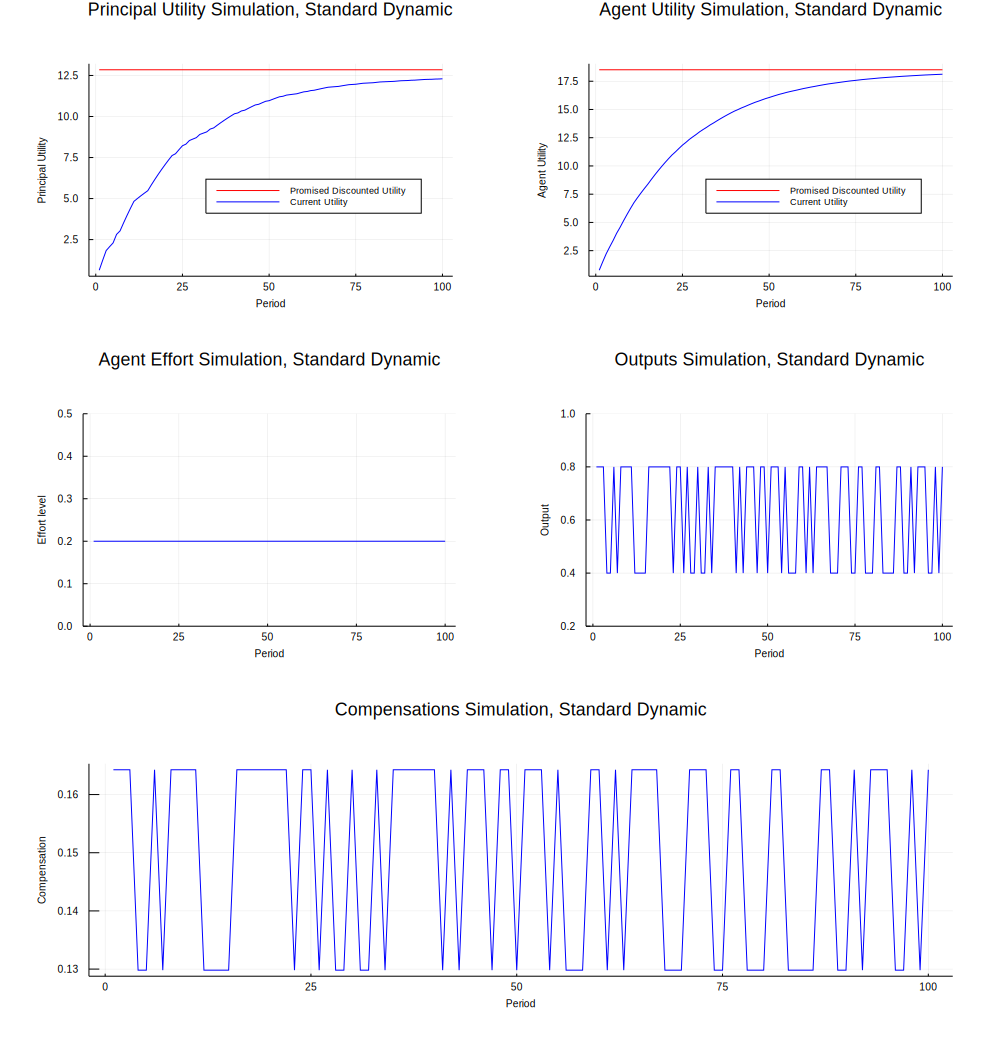

In [8]:
#Effort Plot 
pl2=plot(Simulation_data[:, "Effort"],
color = [:blue],
    legend = false,
    title = string("Agent Effort Simulation, Standard Dynamic"),  
    xlabel = "Period",
    ylabel =  "Effort level", 
    ylims=(0,0.5))
#display(pl2)

#Compensations Plot
pl3=plot(Simulation_data[:, "Compensations"],
color = [:blue],
    legend = false,
    title = string("Compensations Simulation, Standard Dynamic"),  
    xlabel = "Period",
    ylabel =  "Compensation")
#display(pl3)

#Outputs Plot 
pl4=plot(Simulation_data[:, "Outputs"],
color = [:blue],
    legend = false,
    title = string("Outputs Simulation, Standard Dynamic"),  
    xlabel = "Period",
    ylabel =  "Output", 
    ylims=(0.2,1))
#display(pl4)

#Agent Utility Plot
pl5= plot([ones(100)*Est_point[k0, "Utilidad_Agente"], Simulation_data[:, "Agent_Utility"]],
    color = [:red :blue],
    legend = :bottomright, 
    labels = ["Promised Discounted Utility" "Current Utility"],
    title = string("Agent Utility Simulation, Standard Dynamic"),  
    xlabel = "Period",
    ylabel =  "Agent Utility")
#display(pl5)

#Principal Utility Plot
pl6 = plot([ones(100)*Est_point[k0, "Utilidad_Principal"], Simulation_data[:, "Principal_Utility"]],
    color = [:red :blue],
    legend = :bottomright,
    labels = ["Promised Discounted Utility" "Current Utility"],
    title = string("Principal Utility Simulation, Standard Dynamic"),  
    xlabel = "Period",
    ylabel =  "Principal Utility")
#display(pl6)

#Layout
l = @layout [a b; c d; e ]

#Figure 
complete_plot = plot(pl6, pl5, pl2, pl4, pl3, layout = l,
    size = (1000,1050),
    #dpi = 1000,
    xtickfont = font(7), 
    ytickfont = font(7), 
    guidefont = font(7), 
    titlefont = font(12),
    legendfont = font(6),
    markersize = 3,
    margin = 10mm) 
display(complete_plot)
#Save figure 
#savefig("CRA/Simulations/Sim_cra_h50_2")